In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt	
from DownloadDados import *
from MetodosEstatisticos import *
from MetodosEspecificos import *

In [2]:
Downloader = DownloadANA()
Analyses = Analise_de_Maximos()

In [3]:
# Definir os parâmetros de teste
codigo_estacao_teste = "41151000"  # Substitua por um código real de estação
data_inicio_teste = "1914-01-01"
data_fim_teste = "2024-01-10"
output_dir_teste = r"C:\Projetos\Metodos baixar dados"

# Tipos de dados disponíveis para o teste
tipos_dados_teste = {
    "3": "Vazao"
}

# Níveis de consistência disponíveis para o teste
niveis_consistencia_teste = {
    "2": "Consistido"
}

df = Downloader.buscar_dados_hidroweb(codigo_estacao_teste, data_inicio_teste, data_fim_teste, output_dir_teste, tipos_dados_teste, niveis_consistencia_teste)


🔄 Baixando Vazao (Consistido) para estação 41151000...
✅ Dados salvos em 'C:\Projetos\Metodos baixar dados\hidro_inventario_41151000_Vazao_Consistido.xlsx' no formato brasileiro (vírgula como separador decimal)

🚀 Download concluído para todos os tipos de dados e níveis de consistência!


In [4]:
df

,Data,Vazao,EstacaoCodigo,NivelConsistencia
11256,1994-05-28,2.4818,41151000,2
11257,1994-05-29,2.3889,41151000,2
11258,1994-05-30,2.3889,41151000,2
11259,1994-05-31,2.3889,41151000,2
11226,1994-06-01,2.3889,41151000,2
...,...,...,...,...
26,2024-01-27,3.7539,41151000,1
27,2024-01-28,3.2019,41151000,1
28,2024-01-29,3.1527,41151000,1
29,2024-01-30,2.5286,41151000,1


In [5]:
df_POT = df.loc[:, ["Data", "Vazao"]].copy()
df_POT.reset_index(drop=True)


,Data,Vazao
0,1994-05-28,2.4818
1,1994-05-29,2.3889
2,1994-05-30,2.3889
3,1994-05-31,2.3889
4,1994-06-01,2.3889
...,...,...
11255,2024-01-27,3.7539
11256,2024-01-28,3.2019
11257,2024-01-29,3.1527
11258,2024-01-30,2.5286


In [6]:
u = 20 # Definir threshold

df_POT_Threshold = df_POT[df_POT['Vazao'] > u].copy()
df_POT_Threshold = df_POT_Threshold.sort_values('Data').copy()

# Calcular a diferença em dias entre datas consecutivas
df_POT_Threshold['Intervalo'] = df_POT_Threshold['Data'].diff().dt.days
df_POT_Threshold.reset_index(drop=True, inplace=True)

In [7]:
df_POT_Threshold

,Data,Vazao,Intervalo
0,1995-12-14,33.5390,NaN
1,1995-12-26,51.4140,12.0
2,1996-11-21,41.8951,331.0
3,1996-12-25,22.1039,34.0
4,1997-01-02,83.4621,8.0
5,1997-01-03,81.6651,1.0
6,1997-01-04,91.5962,1.0
7,1997-01-05,37.7446,1.0
8,1997-01-06,38.5587,1.0
9,2000-01-28,56.1845,1117.0


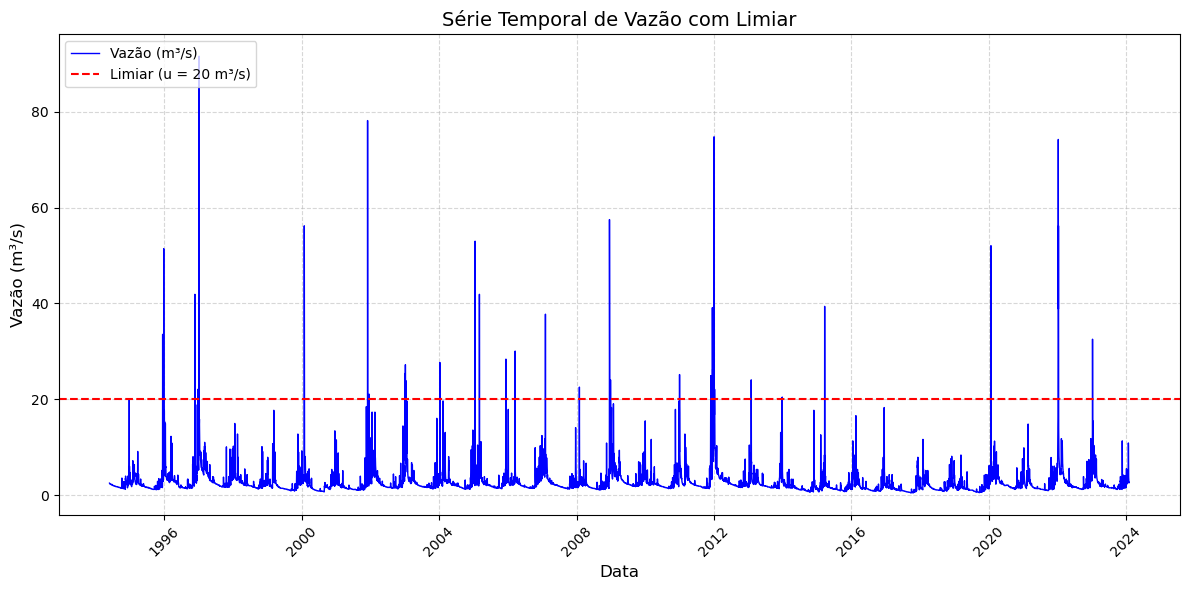

In [8]:
# Converter 'Data' para datetime (se ainda não estiver)
df['Data'] = pd.to_datetime(df['Data'])

# Criar o gráfico
plt.figure(figsize=(12, 6))

# Plotar a série temporal
plt.plot(df['Data'], df['Vazao'], 
         color='blue', 
         linewidth=1,
         label='Vazão (m³/s)')

# Adicionar linha do limiar
plt.axhline(y=u, 
            color='red', 
            linestyle='--', 
            linewidth=1.5,
            label=f'Limiar (u = {u} m³/s)')

# Configurações do gráfico
plt.title('Série Temporal de Vazão com Limiar', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Vazão (m³/s)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left')  # Posicionar legenda

# Ajustar eixos
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Média dos Valores que excederam o Threshold (u) conforme variamos o Threshold

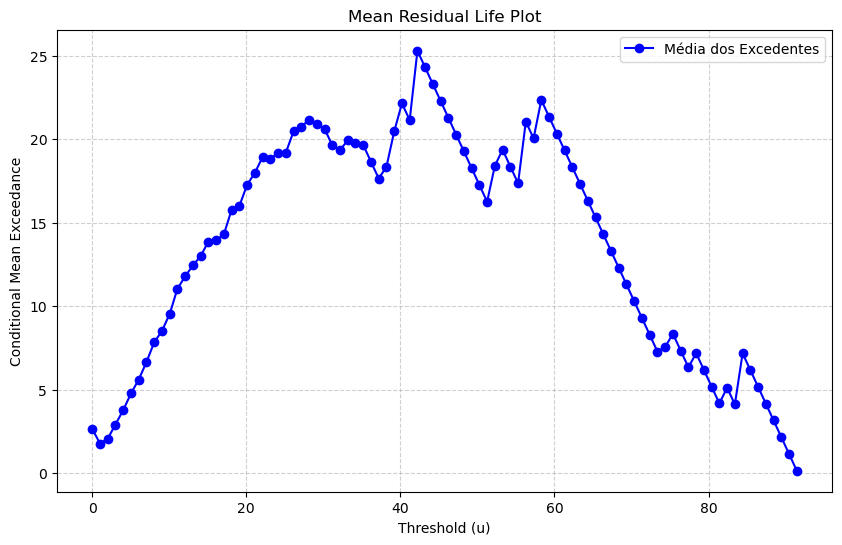

In [10]:
# Definir uma faixa de limiares (ajuste conforme seus dados)
u_values = np.linspace(0, 200, 200)  # 50 pontos entre 0 e 50

# Calcular a média dos excedentes para cada u
mean_excess = []
for u in u_values:
    excess = df_POT[df_POT['Vazao'] > u]['Vazao'] - u
    mean_excess.append(excess.mean())

# Plotar
plt.figure(figsize=(10, 6))
plt.plot(u_values, mean_excess, 'bo-', label='Média dos Excedentes')


# Configurações do gráfico
plt.title("Mean Residual Life Plot")
plt.xlabel("Threshold (u)")
plt.ylabel("Conditional Mean Exceedance")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

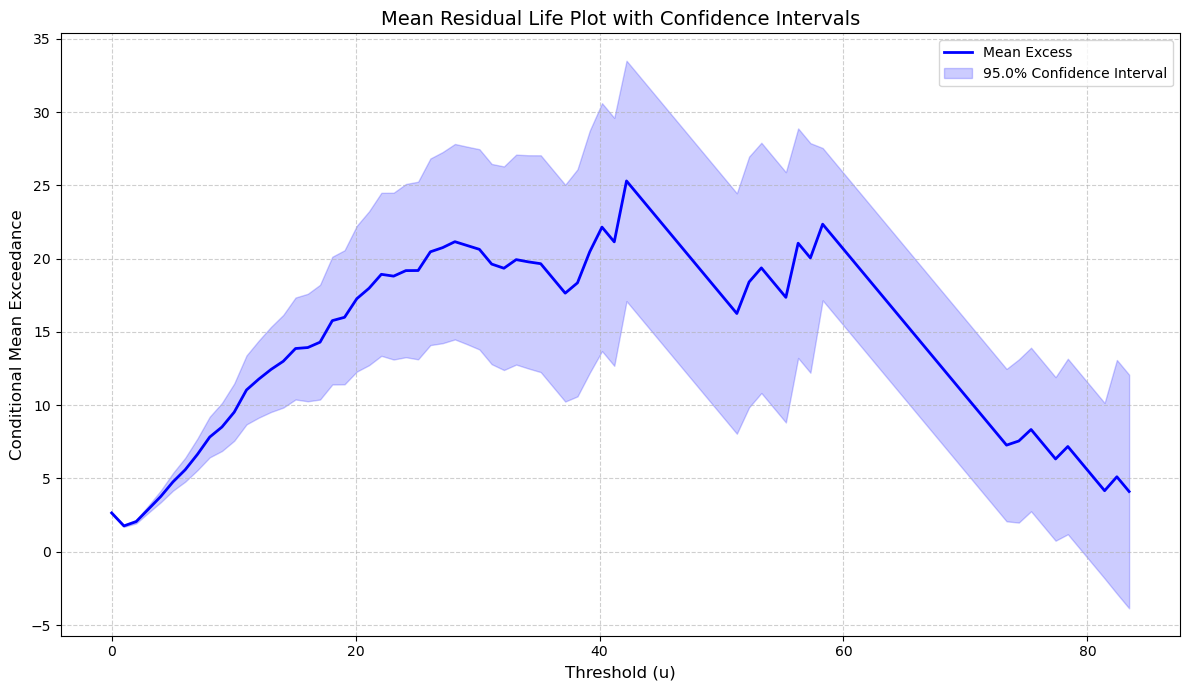

In [11]:
def plot_mean_residual_life(df, u_min=0, u_max=200, n_u=200, alpha=0.05, log_scale=False):
    """
    Plots the Mean Residual Life (MRL) with confidence intervals.
    
    Parameters:
    -----------
    df : DataFrame
        DataFrame with columns 'Data' (datetime) and 'Vazao'.
    u_min : float
        Minimum threshold (default: 0).
    u_max : float
        Maximum threshold (default: 200).
    n_u : int
        Number of threshold points (default: 200).
    alpha : float
        Significance level for confidence intervals (default: 0.05 for 95% CI).
    log_scale : bool
        If True, uses log scale for the y-axis (default: False).
    """
    # Generate threshold values
    u_values = np.linspace(u_min, u_max, n_u)
    
    # Initialize lists for results
    mean_excess = []
    lower_ci = []
    upper_ci = []
    
    for u in u_values:
        # Get exceedances over u
        exceedances = df[df['Vazao'] > u]['Vazao'] - u
        nu = len(exceedances)
        
        if nu > 1:
            wu = exceedances.mean()
            swu = exceedances.std(ddof=1)  # Sample standard deviation
            se = swu / np.sqrt(nu)        # Standard error
            
            # Critical value for (1-alpha/2) confidence
            z = norm.ppf(1 - alpha/2)
            
            mean_excess.append(wu)
            lower_ci.append(wu - z * se)
            upper_ci.append(wu + z * se)
        else:
            # Not enough data for CI
            mean_excess.append(np.nan)
            lower_ci.append(np.nan)
            upper_ci.append(np.nan)
    
    # Plotting
    plt.figure(figsize=(12, 7))
    
    # Main plot (mean excess)
    plt.plot(u_values, mean_excess, 'b-', lw=2, label='Mean Excess')
    
    # Confidence intervals
    plt.fill_between(u_values, lower_ci, upper_ci, color='blue', alpha=0.2, 
                    label=f'{100*(1-alpha)}% Confidence Interval')
    
    # Formatting
    plt.title('Mean Residual Life Plot with Confidence Intervals', fontsize=14)
    plt.xlabel('Threshold (u)', fontsize=12)
    plt.ylabel('Conditional Mean Exceedance', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    
    if log_scale:
        plt.yscale('log')
    
    plt.tight_layout()
    plt.show()

# Example usage:
plot_mean_residual_life(df_POT, u_min=0, u_max=200, n_u=200, alpha=0.05)

# Plot Média de excedentes por ano conforme variamos o Threshold (u)


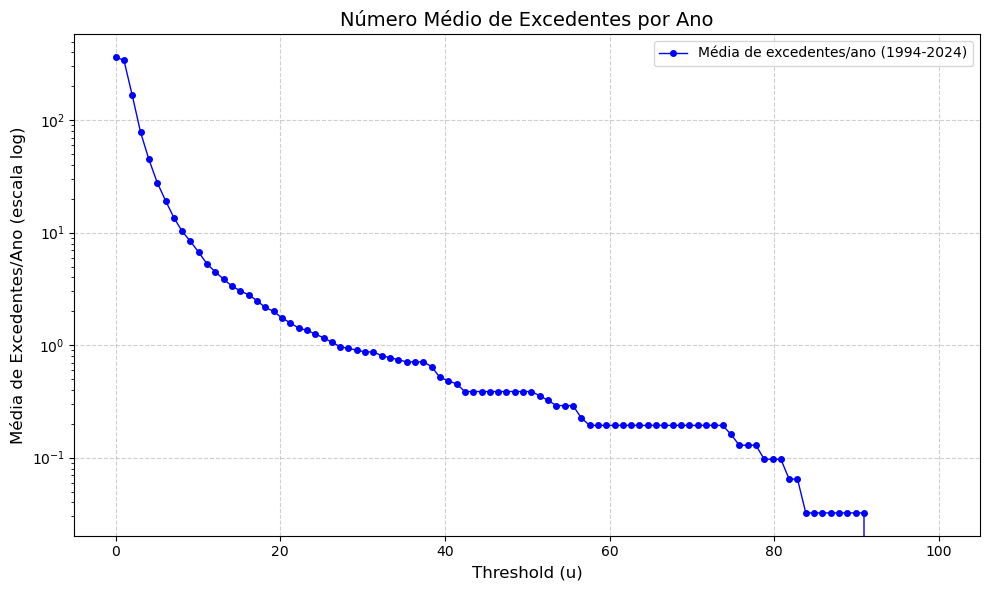

: 

In [12]:
def plot_media_excedentes_por_ano(df, u_min=0, u_max=200, n_u=200, log_scale=False):
    """
    Plota o número médio de excedentes por ano para diferentes limiares u.
    
    Parâmetros:
    -----------
    df : DataFrame
        DataFrame com colunas 'Data' (datetime) e 'Vazao'.
    u_min : float
        Valor mínimo do limiar u (padrão: 0).
    u_max : float
        Valor máximo do limiar u (padrão: 200).
    n_u : int
        Número de pontos entre u_min e u_max (padrão: 200).
    log_scale : bool
        Se True, usa escala logarítmica no eixo Y (padrão: False).
    """
    # Verificar se 'Data' está em formato datetime
    if not pd.api.types.is_datetime64_any_dtype(df['Data']):
        df['Data'] = pd.to_datetime(df['Data'])
    
    # Calcular período abrangido pelos dados
    ano_inicio = df['Data'].dt.year.min()
    ano_fim = df['Data'].dt.year.max()
    total_anos = ano_fim - ano_inicio + 1
    
    # Gerar valores de u
    u_values = np.linspace(u_min, u_max, n_u)
    
    # Calcular média de excedentes por ano para cada u
    medias_por_ano = []
    for u in u_values:
        excedentes = df[df['Vazao'] > u]
        media_anual = len(excedentes) / total_anos
        medias_por_ano.append(media_anual)
    
    # Configurar o gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(u_values, medias_por_ano, 'bo-', linewidth=1, markersize=4, 
             label=f'Média de excedentes/ano ({ano_inicio}-{ano_fim})')
    
    # Adicionar escala logarítmica se solicitado
    if log_scale:
        plt.yscale('log')
        plt.ylabel('Média de Excedentes/Ano (escala log)', fontsize=12)
    else:
        plt.ylabel('Média de Excedentes/Ano', fontsize=12)
    
    # Detalhes do gráfico
    plt.title('Número Médio de Excedentes por Ano', fontsize=14)
    plt.xlabel('Threshold (u)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()
    

# Exemplo de uso:
plot_media_excedentes_por_ano(df_POT, u_min=0, u_max=100, n_u=100, log_scale=True)